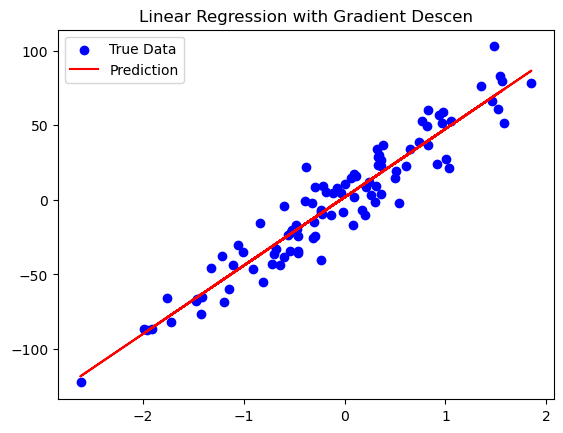

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#here I want to experiment how GD behave in regression and classification 
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, color='blue', label='True Data')
plt.plot(X, y_pred, color='red', label='Prediction')
plt.title("Linear Regression with Gradient Descen")
plt.legend()
plt.show()

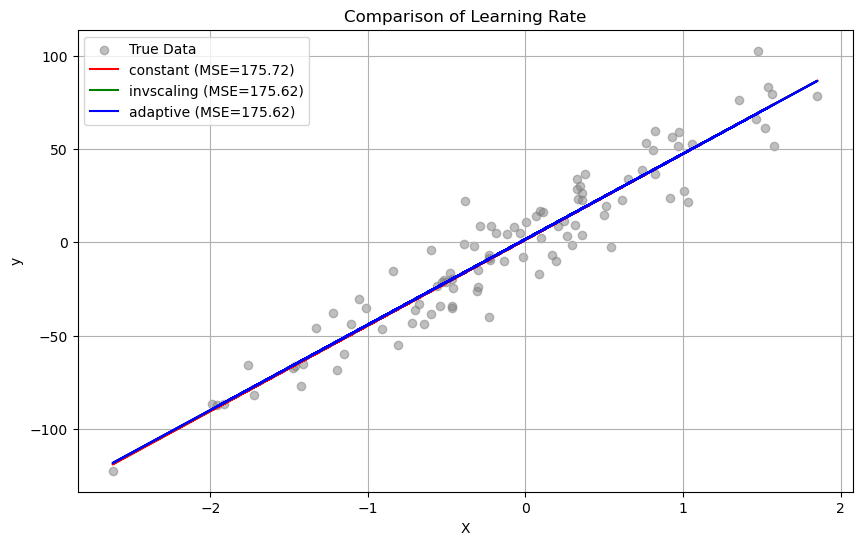

In [15]:
#here I Try different learning rate like "constant"and "adaptive" its look really similar but with small difference but when searching I descover some differences
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Define different learning strategies to compare
strategies = ['constant', 'invscaling', 'adaptive']
results = {}

for strategy in strategies:
    model = make_pipeline(
        StandardScaler(),
        SGDRegressor(max_iter=1000, learning_rate=strategy, eta0=0.01, tol=1e-3, random_state=42, verbose=0)
    )
    model.fit(X, y)
    
    
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    results[strategy] = (model, mse, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='True Data', alpha=0.5)

colors = ['red', 'green', 'blue']
for color, strategy in zip(colors, strategies):
    _, mse, y_pred = results[strategy]
    plt.plot(X, y_pred, color=color, label=f"{strategy} (MSE={mse:.2f})")

plt.title("Comparison of Learning Rate")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

